In [5]:

import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt



# **Step 1.1: Importing libraries**

In [6]:
# Data Handling and Processing
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns 
import matplotlib.pyplot as plt

# Machine Learning Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model Selection & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV


# **Step 1.2: loading the datasets**

In [7]:
# load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")


# **Step 2: Exploratory Data Analysis(Data Understanding and Exploration)**


In [8]:
# size of dataset
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (100000, 76)
Test Data Shape: (10000, 75)


In [9]:
train_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,DateAS,DateOS,target
0,f541bae429089117c4aac39c90dd3416,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1003.0,0,7.0,0,53447.0,1.0,...,0,0.0,1,0,1.0,0.0,6.0,2018-09-10 10:11:00,2018-04-17,0
1,dc2b14d9ce3a0ce4050bb640190f2ca5,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1465.0,0,7.0,0,53447.0,1.0,...,1,0.0,0,0,0.0,0.0,10.0,2018-08-16 00:01:00,2018-08-14,1
2,fd20c5f010e9c5f91ad1c6b3e0da68a0,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1546.0,0,7.0,0,53447.0,1.0,...,0,0.0,0,0,0.0,1.0,6.0,2018-09-20 23:20:00,2018-09-11,1
3,38711eae85eb77a72ec5dfdf27eb2a76,win8defender,1.1.15200.1,4.12.17007.18011,1.275.1141.0,0,7.0,0,46413.0,2.0,...,1,0.0,0,0,0.0,0.0,12.0,2018-09-14 00:32:00,2018-01-03,1
4,32607c9a543a9214e2c7e45800ed4849,win8defender,1.1.15200.1,4.13.17134.228,1.275.1283.0,0,7.0,0,40466.0,2.0,...,0,0.0,0,0,0.0,1.0,7.0,2018-09-15 19:34:00,2018-09-11,0


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   MachineID                           10000 non-null  object 
 1   ProductName                         10000 non-null  object 
 2   EngineVersion                       10000 non-null  object 
 3   AppVersion                          10000 non-null  object 
 4   SignatureVersion                    10000 non-null  object 
 5   IsBetaUser                          10000 non-null  int64  
 6   RealTimeProtectionState             9991 non-null   float64
 7   IsPassiveModeEnabled                10000 non-null  int64  
 8   AntivirusConfigID                   9998 non-null   float64
 9   NumAntivirusProductsInstalled       9998 non-null   float64
 10  NumAntivirusProductsEnabled         9998 non-null   float64
 11  HasTpm                              10000 

# Observation from basic EDA

* there are total 76 columns including Target column in dataset
* Target column is in binary form 0 or 1 indicating yes and no which is int data type
* total 48 numeric columns including 31 float and 17 int data types
* total 28 columns are object type


In [12]:
# Descriptive statistics for numerical columns
print("-------------Train Dataset Description-------------")
print(train_data.describe())
print("-------------Test Dataset Description-------------")
print(test_data.describe())

-------------Train Dataset Description-------------
       IsBetaUser  RealTimeProtectionState  IsPassiveModeEnabled  \
count    100000.0             99934.000000         100000.000000   
mean          0.0                 6.848430              0.017620   
std           0.0                 1.015166              0.131566   
min           0.0                 0.000000              0.000000   
25%           0.0                 7.000000              0.000000   
50%           0.0                 7.000000              0.000000   
75%           0.0                 7.000000              0.000000   
max           0.0                 8.000000              1.000000   

       AntivirusConfigID  NumAntivirusProductsInstalled  \
count       99924.000000                   99924.000000   
mean        47975.710440                       1.326528   
std         13803.321533                       0.520681   
min            39.000000                       1.000000   
25%         49480.000000                

# Observations from Train and Test Dataset Description
* Dataset size: both train and test dataset has 100000 rows
* some features has missing values such as CityID, RegionIdentifier and FirmwareManufacturerID
* the target variable has mean of 0.505 which shows a balanced class distribution in the train dataset
* Distribution Consistency: The mean, standard deviation, and quartile values for most features are similar between the train and test datasets. This suggests that both datasets follow a similar distribution, ensuring the model's generalization capability.
* Binary Features:
  IsBetaUser is always 0, meaning no beta users are present in either dataset. which suggests this feature may have no impact and could potentially be dropped.
  IsPassiveModeEnabled, IsVirtualDevice, IsAlwaysOnAlwaysConnectedCapable, and IsFlightsDisabled have low mean values, indicating they are rarely enabled.
* Antivirus Features: 
RealTimeProtectionState mostly centers around 7 with a maximum value of 8.
NumAntivirusProductsInstalled and NumAntivirusProductsEnabled are generally low, with a mean close to 1.
* System Configuration:
HasTpm is 1 for most rows, indicating that Trusted Platform Module (TPM) is generally enabled.
IsSecureBootEnabled has a balanced distribution between 0 and 1, which may contribute significantly to model prediction.
* Hardware Features:
IsTouchEnabled and IsPenCapable are low in frequency, suggesting touch and pen-supported devices are uncommon.
IsGamer has a mean of ~0.3, showing that roughly 30% of users are classified as gamers.
* Geographical Features:
CountryID, CityID, and GeoRegionID vary widely, indicating a diverse range of locations. The distribution is similar in both train and test datasets. These may require encoding (like target encoding) to capture their potential impact.
  

#  Graph plotting

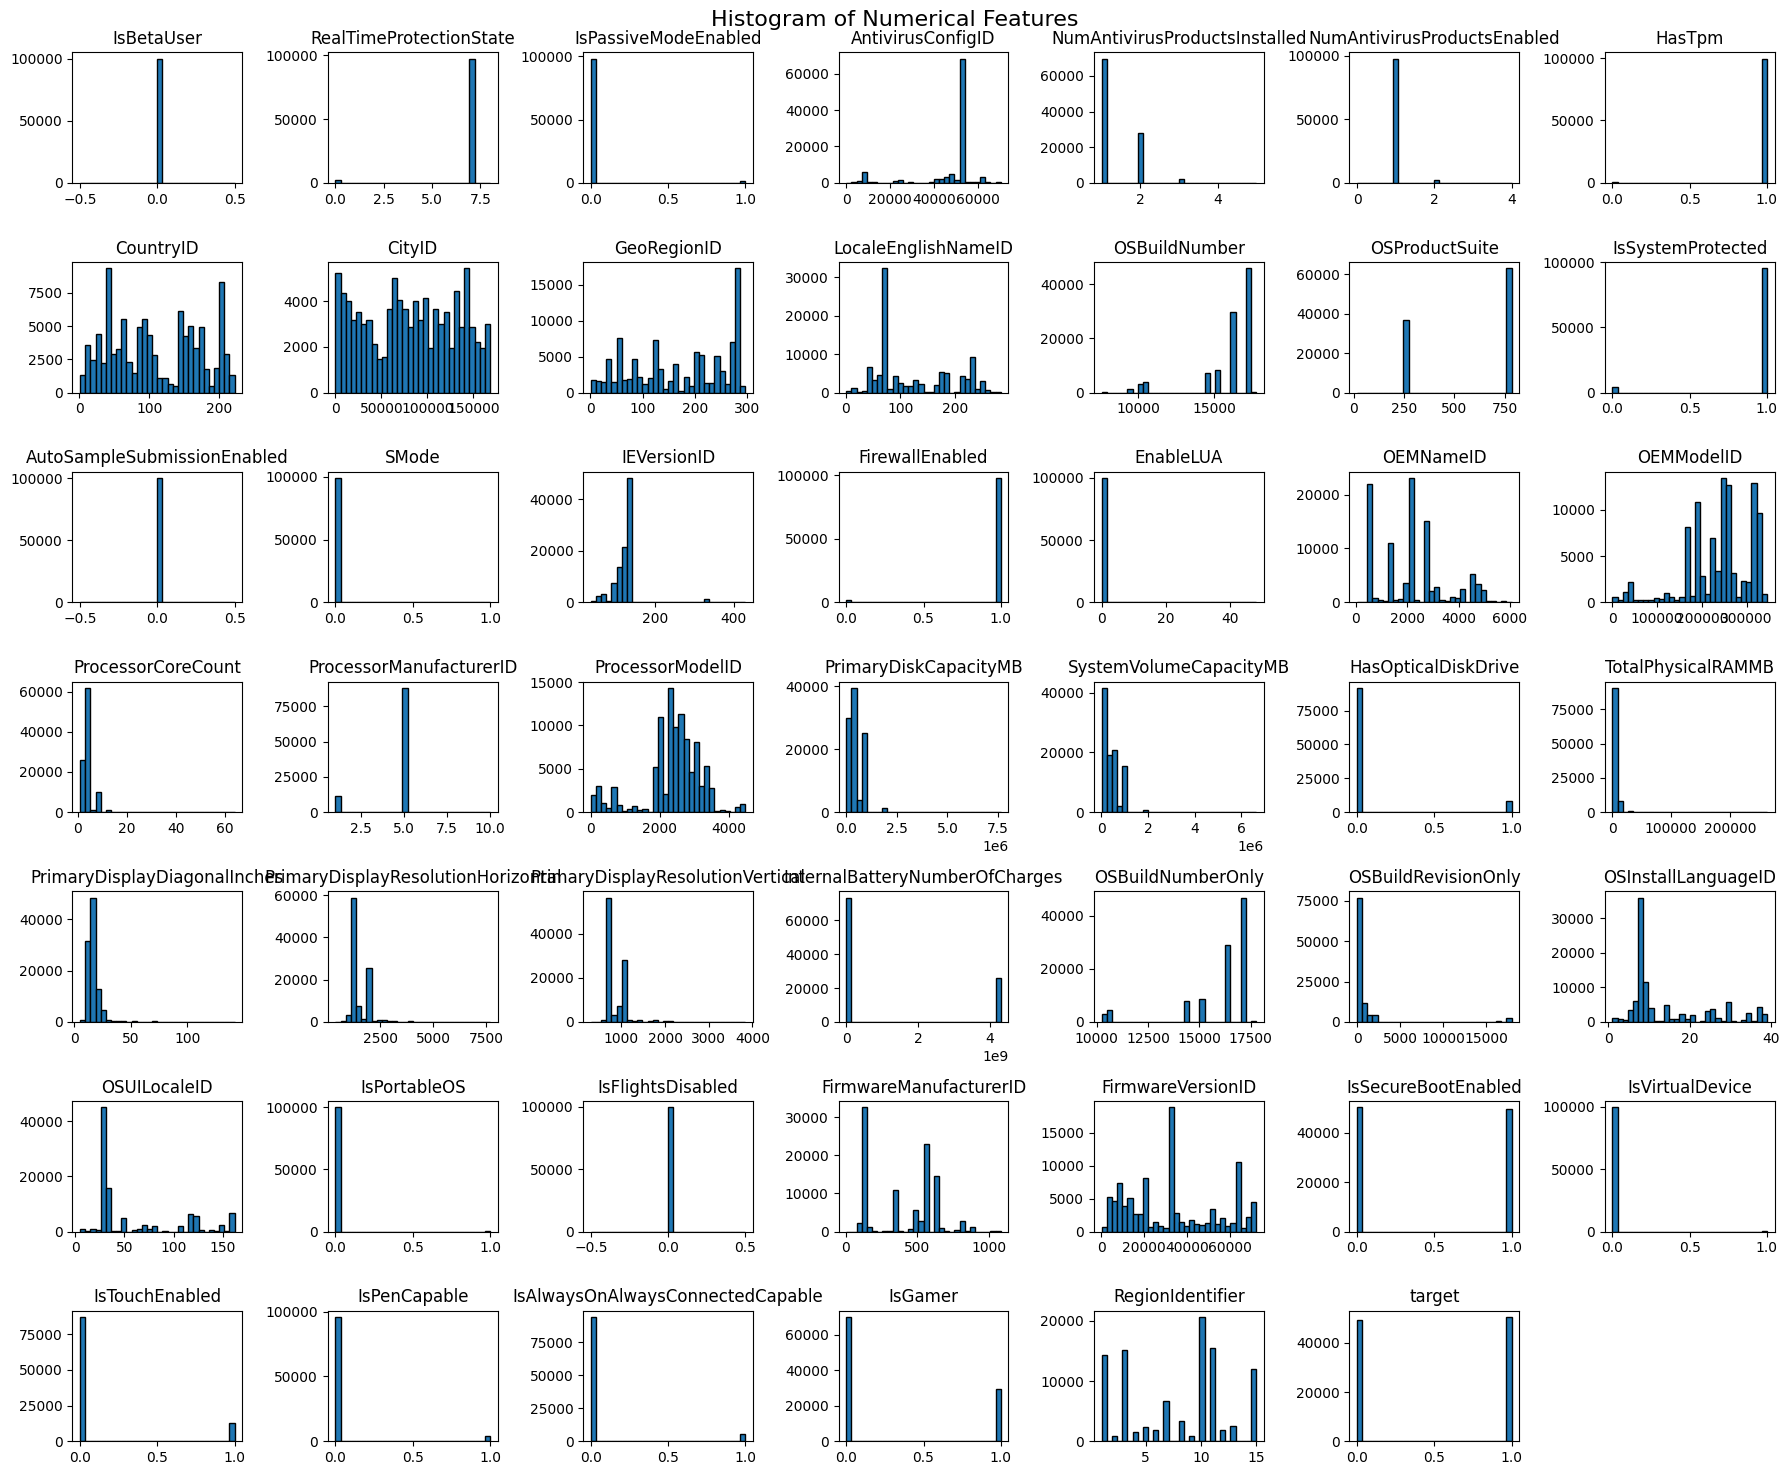

In [13]:
# 1. Histogram for Numerical Features
# Helps to understand the distribution of values.

train_data.select_dtypes(include=['float64', 'int64']).hist(
    figsize=(18, 15), bins=30, grid=False, edgecolor='black'
)
plt.suptitle('Histogram of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


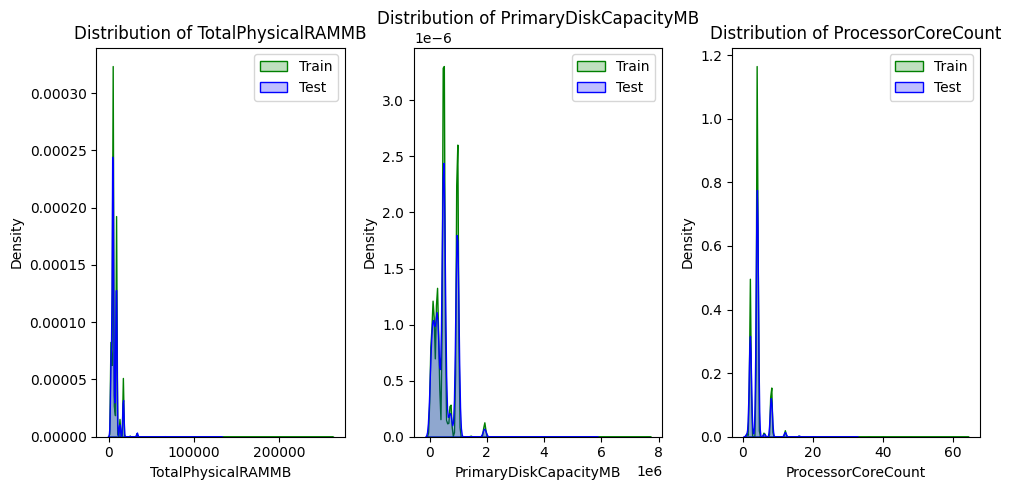

In [14]:
# Distribution Plots for Key Features
# To compare train and test data distributions for key numerical features.

num_cols = ['TotalPhysicalRAMMB', 'PrimaryDiskCapacityMB', 'ProcessorCoreCount']  

plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(train_data[col], fill=True, color='green', label='Train')
    sns.kdeplot(test_data[col], fill=True, color='blue', label='Test')
    plt.title(f'Distribution of {col}')
    plt.legend()
    plt.tight_layout()
plt.show()

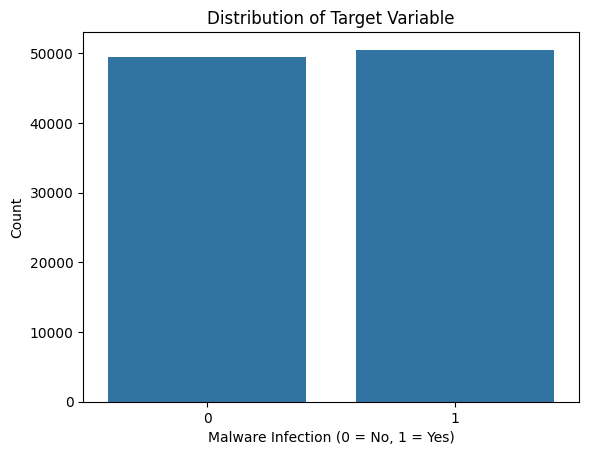

target
1    50.525
0    49.475
Name: proportion, dtype: float64


In [15]:
# Count plot for target variable
sns.countplot(x=train_data['target'])
plt.xlabel("Malware Infection (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of Target Variable")
plt.show()

# Check percentage
print(train_data['target'].value_counts(normalize=True) * 100)

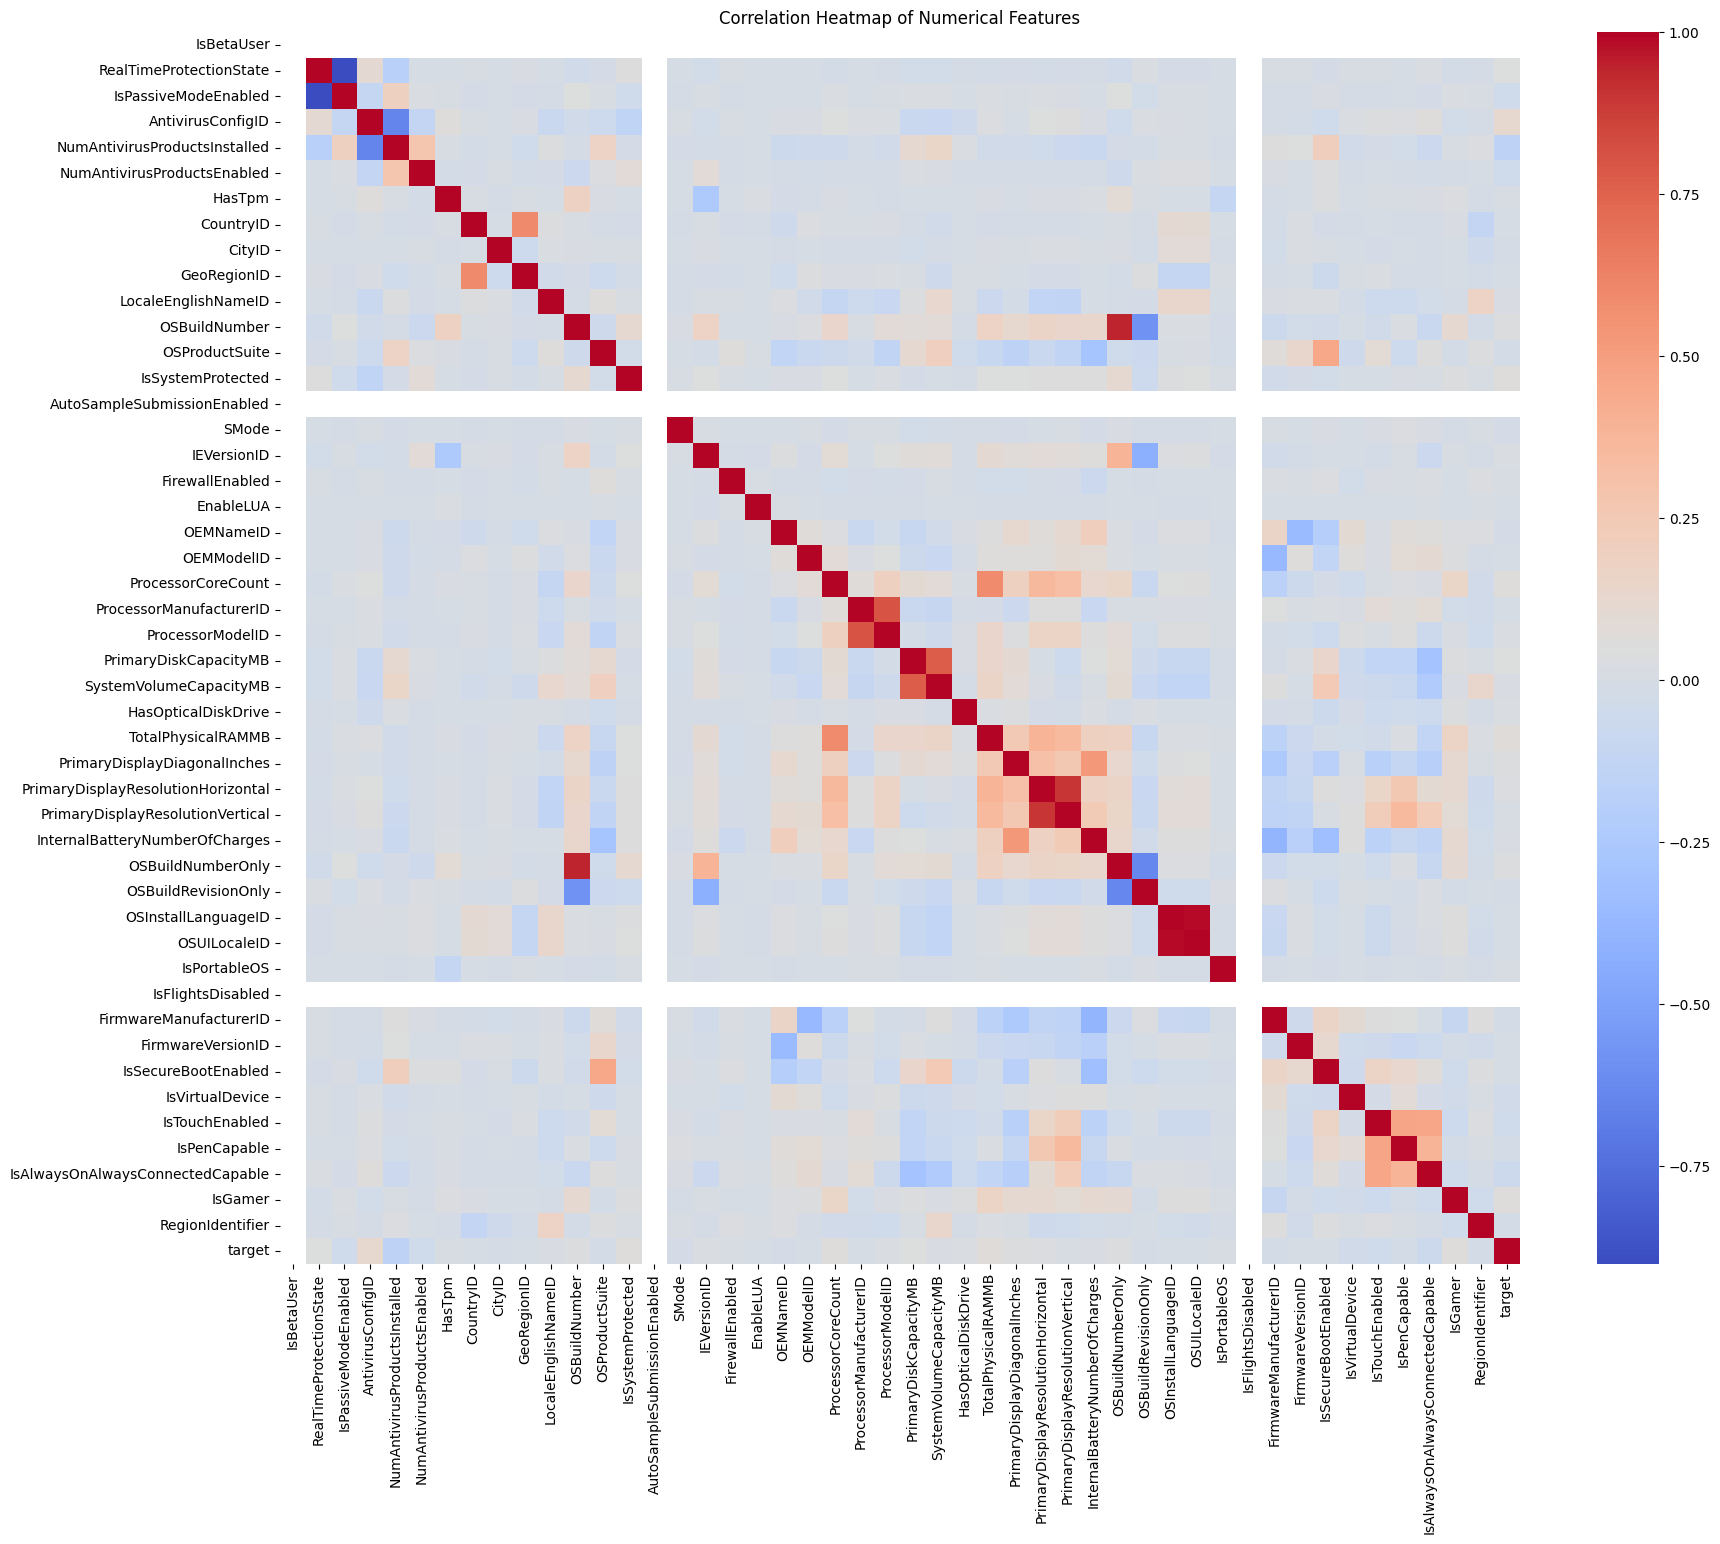

In [16]:
# 3. Correlation analysis for numerical features
corr_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# **Preprocessing**

In [17]:
# Identify duplicate rows
train_duplicates = train_data.duplicated()
test_duplicates = test_data.duplicated()

print(f"Total duplicate rows in train dataset: {train_duplicates.sum()}")
print(f"Total duplicate rows in test dataset: {test_duplicates.sum()}")

Total duplicate rows in train dataset: 165
Total duplicate rows in test dataset: 2


In [18]:
# Drop duplicate rows from train and test datasets
# train_data= train_data.drop_duplicates().reset_index(drop=True)


# Display the updated dataset sizes
# print(f"Train dataset size after removing duplicates: {train_data.shape[0]}")
# print(f"Test dataset size after removing duplicates: {test_data.shape[0]}")


In [19]:
# Check missing values
missing_train = train_data.isnull().sum().sort_values(ascending=False)
missing_test = test_data.isnull().sum().sort_values(ascending=False)

print("Missing values in Train Dataset:\n", missing_train[missing_train > 0])
print("\nMissing values in Test Dataset:\n", missing_test[missing_test > 0])


Missing values in Train Dataset:
 SMode                                 981
CityID                                623
RegionIdentifier                      559
IsGamer                               559
InternalBatteryNumberOfCharges        515
FirmwareManufacturerID                376
FirmwareVersionID                     334
IsFlightsDisabled                     326
OEMModelID                            228
OEMNameID                             212
FirewallEnabled                       166
TotalPhysicalRAMMB                    151
IsAlwaysOnAlwaysConnectedCapable      134
OSInstallLanguageID                   113
PrimaryDiskCapacityMB                 110
SystemVolumeCapacityMB                110
IEVersionID                           107
ProcessorManufacturerID                85
ProcessorModelID                       85
ProcessorCoreCount                     85
IsSystemProtected                      76
NumAntivirusProductsEnabled            76
NumAntivirusProductsInstalled          76


C:\Users\arjit\AppData\Local\Temp\ipykernel_876\1928708812.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


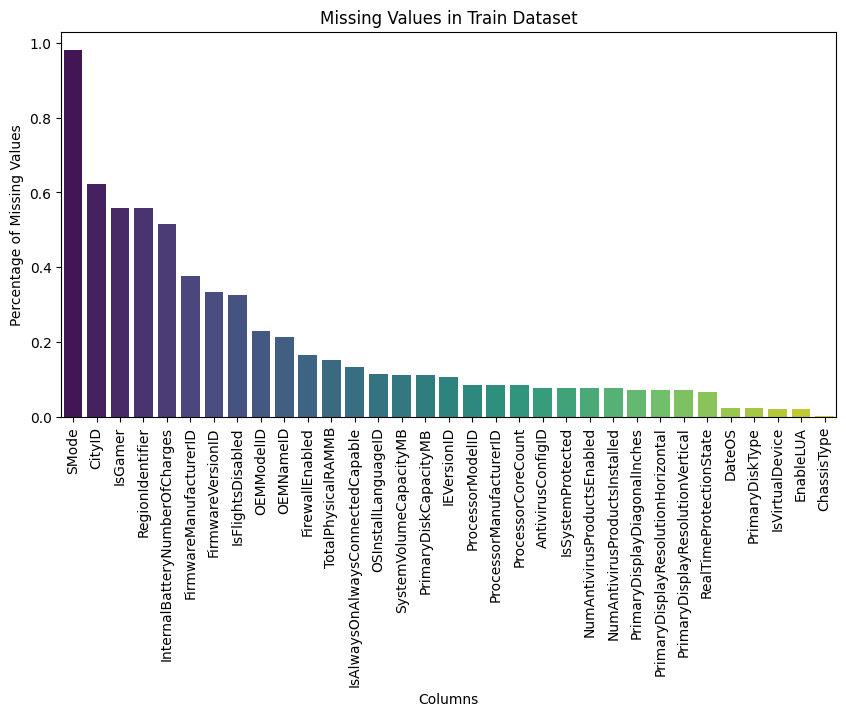

In [20]:

# Check missing values percentage
missing_values = train_data.isnull().sum() / len(train_data) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values in Train Dataset")
plt.show()


In [21]:
# Drop MachineID and IsBetaUser (not useful for prediction)
# train_data.drop(columns=['MachineID'], inplace=True)
# test_data.drop(columns=['MachineID'], inplace=True)
# train_data.drop(columns=['IsBetaUser'], inplace=True)
# test_data.drop(columns=['IsBetaUser'], inplace=True)

# Handling Missing Values

In [22]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = train_data.select_dtypes(include=['object']).columns
num_cols = num_cols.drop('target', errors='ignore')

# Creating imputers
mean_imp = SimpleImputer(strategy='mean')  # For numerical columns
mode_imp = SimpleImputer(strategy='most_frequent')

# Impute numerical columns with mean
train_data[num_cols] = mean_imp.fit_transform(train_data[num_cols])
test_data[num_cols] = mean_imp.transform(test_data[num_cols])

# Impute categorical columns with most frequent value
train_data[cat_cols] = mode_imp.fit_transform(train_data[cat_cols])
test_data[cat_cols] = mode_imp.transform(test_data[cat_cols])

print("Missing values handled successfully!")

Missing values handled successfully!


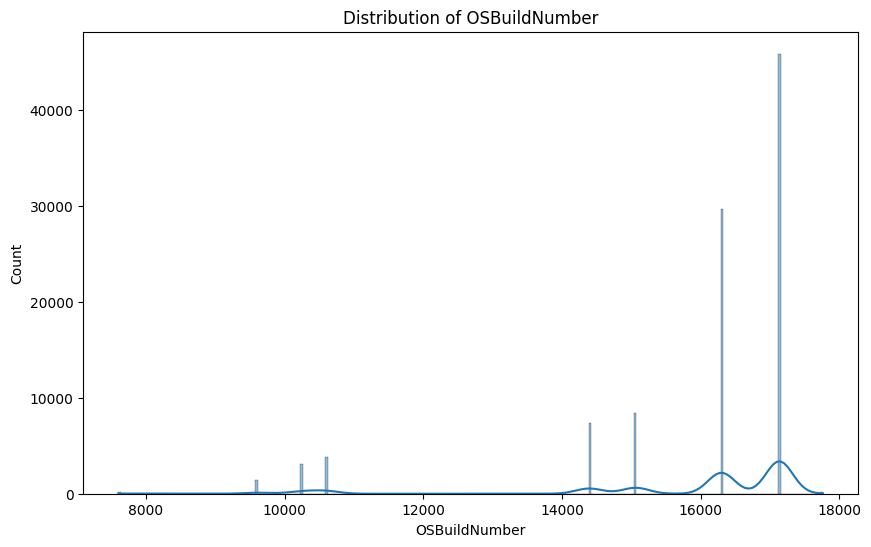

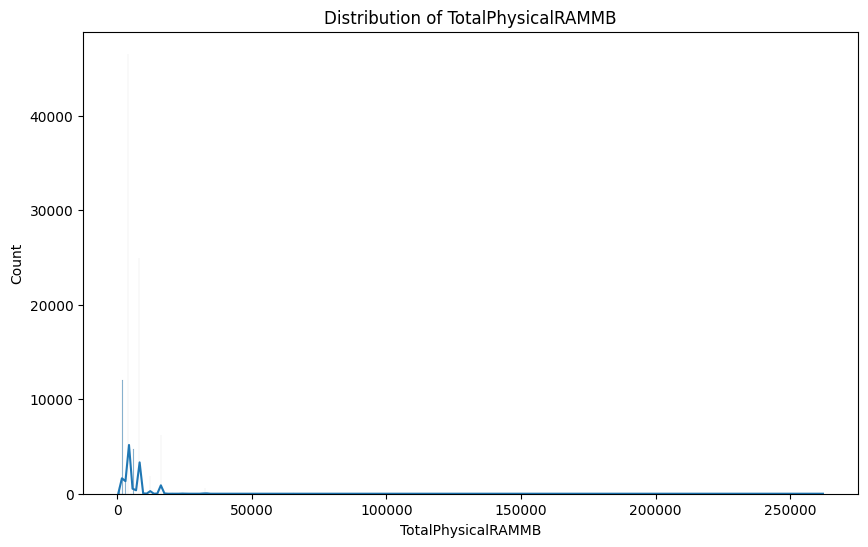

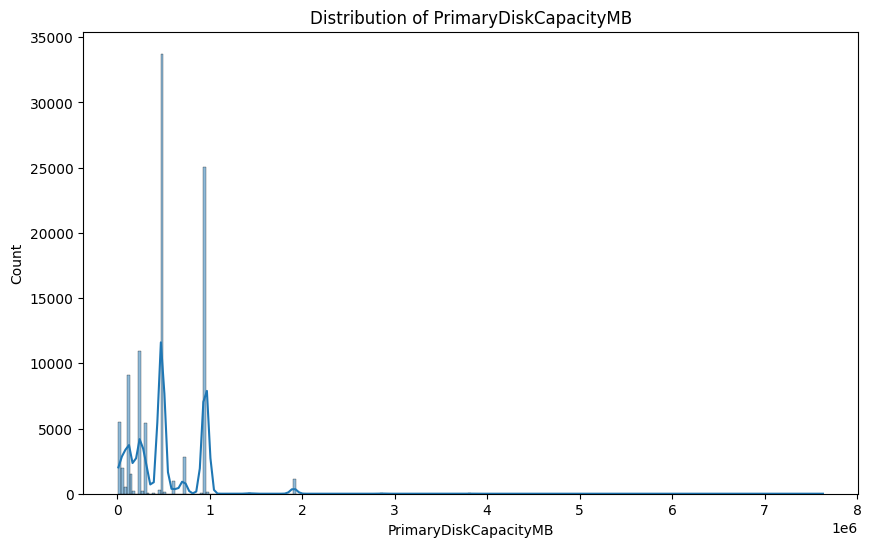

In [23]:
numerical_cols = ['OSBuildNumber', 'TotalPhysicalRAMMB', 'PrimaryDiskCapacityMB']
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
       

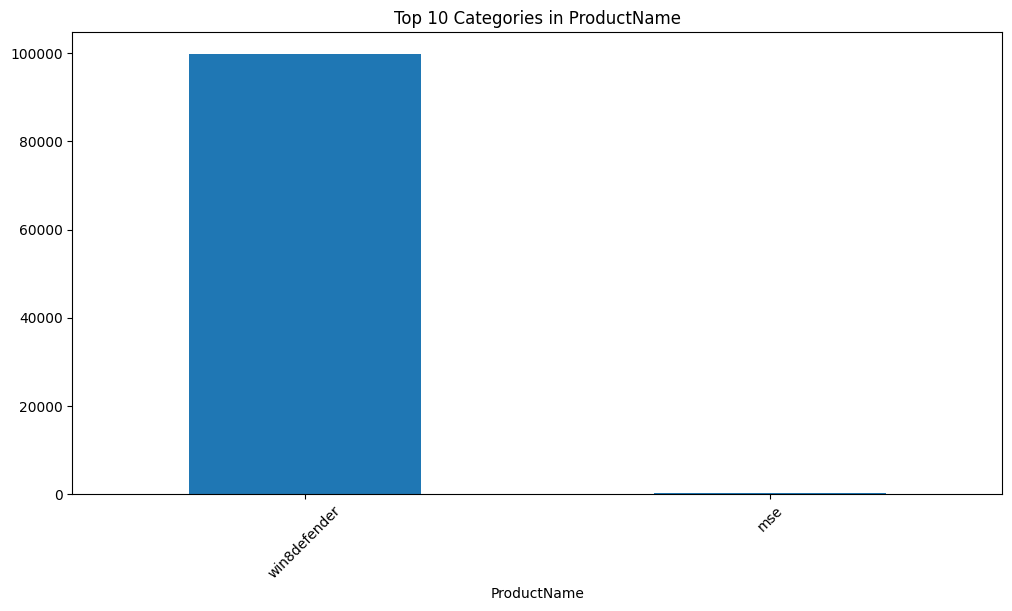

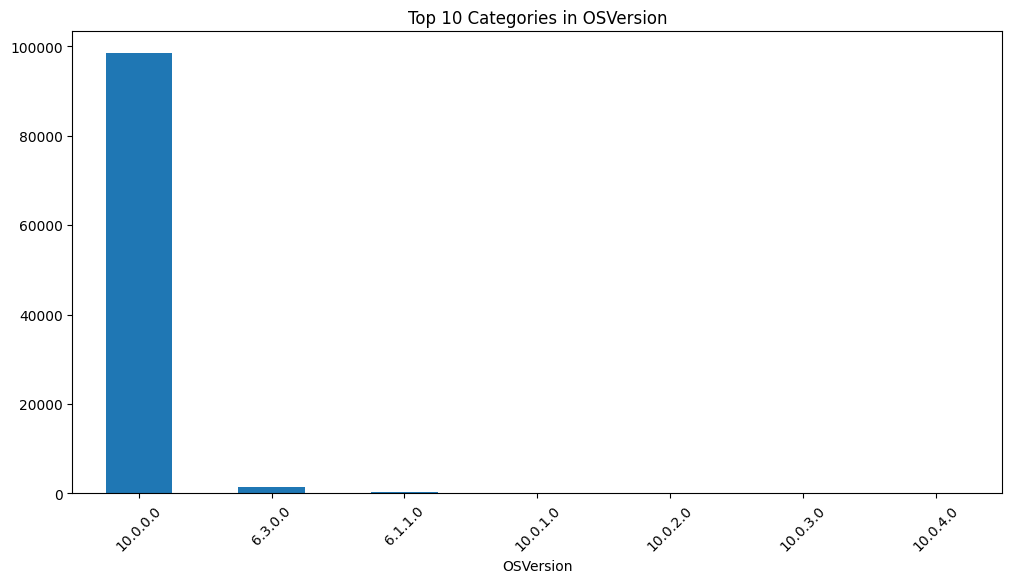

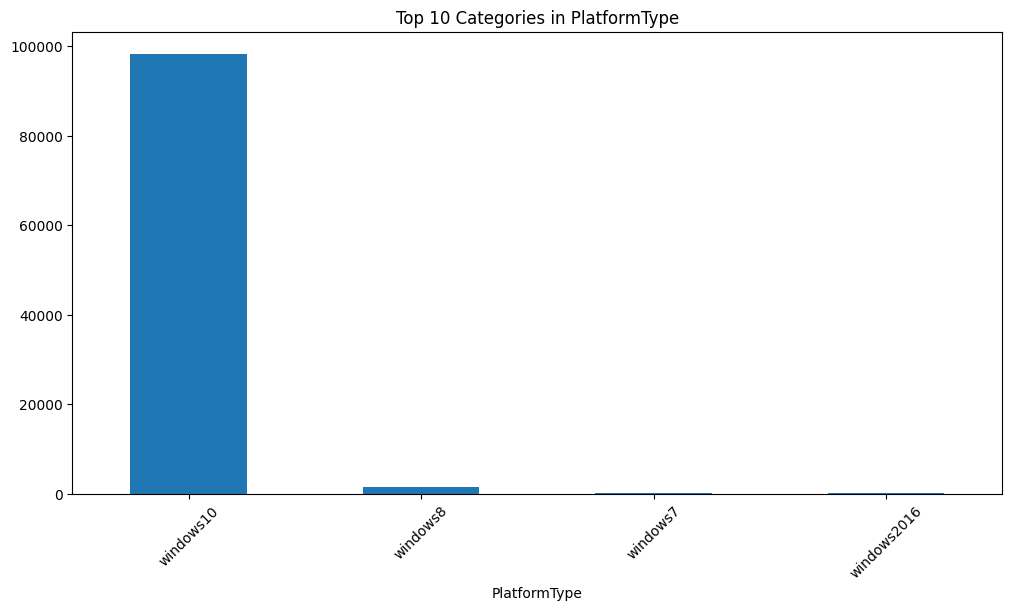

In [24]:
# Categorical feature analysis
categorical_cols = ['ProductName', 'OSVersion', 'PlatformType']
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    train_data[col].value_counts().nlargest(10).plot(kind='bar')
    plt.title(f'Top 10 Categories in {col}')
    plt.xticks(rotation=45)
    plt.show()

# Feature Engineering 

In [25]:
# Convert date columns to datetime format
train_data['DateAS'] = pd.to_datetime(train_data['DateAS'])
train_data['DateOS'] = pd.to_datetime(train_data['DateOS'])
train_data['AS_OS_Diff'] = (train_data['DateAS'] - train_data['DateOS']).dt.days

test_data['DateAS'] = pd.to_datetime(test_data['DateAS'])
test_data['DateOS'] = pd.to_datetime(test_data['DateOS'])
test_data['AS_OS_Diff'] = (test_data['DateAS'] - test_data['DateOS']).dt.days

# Drop original date columns
train_data.drop(columns=['DateAS', 'DateOS'], inplace=True)
test_data.drop(columns=['DateAS', 'DateOS'], inplace=True)


In [26]:
# Creating performance-related features
train_data['Storage_Efficiency'] = train_data['PrimaryDiskCapacityMB'] / train_data['SystemVolumeCapacityMB']
# RAM Efficiency
train_data['RAM_Efficiency'] = train_data['TotalPhysicalRAMMB'] / train_data['PrimaryDiskCapacityMB']


# Performance-related features for test data
test_data['Storage_Efficiency'] = test_data['PrimaryDiskCapacityMB'] / test_data['SystemVolumeCapacityMB']
test_data['RAM_Efficiency'] = test_data['TotalPhysicalRAMMB'] / test_data['PrimaryDiskCapacityMB']


In [27]:
# Dropping original columns used for feature creation
cols_to_drop = [
    'PrimaryDiskCapacityMB', 
    'SystemVolumeCapacityMB', 
    'ProcessorCoreCount', 
    'ProcessorModelID', 
    'TotalPhysicalRAMMB'
]
train_data.drop(columns=cols_to_drop, inplace=True)
test_data.drop(columns=cols_to_drop, inplace=True)

# **Feature Scaling and Encoding**

In [28]:
num_cols = train_data.select_dtypes(include=['int64','int32','float64']).columns.drop('target', errors='ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

print("Standard Scalar implemented successfully!")

Standard Scalar implemented successfully!


In [29]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = train_data.select_dtypes(include=['object']).columns
test_categorical_cols = test_data.select_dtypes(include=['object']).columns

# Dictionary to store label encoders
label_encoders = {}

# Apply Label Encoding to Training Data
for col in categorical_cols:
    encoder = LabelEncoder()
    train_data[col] = encoder.fit_transform(train_data[col])  #  Fit & transform on train data
    label_encoders[col] = encoder  # Save encoder for later

# Apply the same encoding to Test Data
for col in test_categorical_cols:
    if col in label_encoders:  # Check if the column was in train data
        test_data[col] = test_data[col].apply(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

In [30]:
import pandas as pd

# Compute correlation matrix
correlation_matrix = train_data.corr()

# Identify pairs with high correlation (absolute value > 0.5)
high_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Filter and display only meaningful correlations (excluding self-correlation)
high_corr_pairs = high_corr_pairs[(high_corr_pairs < 1.0) & (high_corr_pairs > 0.5)]

print(high_corr_pairs)


OSEdition                       OSSkuFriendlyName                 0.998856
OSSkuFriendlyName               OSEdition                         0.998856
OSVersion                       PlatformType                      0.996720
PlatformType                    OSVersion                         0.996720
Processor                       OSArchitecture                    0.993583
                                                                    ...   
OSBuildLab                      FlightRing                        0.528414
InternalBatteryNumberOfCharges  PrimaryDisplayDiagonalInches      0.528342
PrimaryDisplayDiagonalInches    InternalBatteryNumberOfCharges    0.528342
AS_OS_Diff                      OSBuildLab                        0.505770
OSBuildLab                      AS_OS_Diff                        0.505770
Length: 86, dtype: float64


In [31]:
# Correlation with target variable
target_corr = correlation_matrix['target'].abs().sort_values(ascending=False)

# Display top 10 most correlated features
print(target_corr.head(10))


target                              1.000000
NumAntivirusProductsInstalled       0.151317
AntivirusConfigID                   0.118259
Processor                           0.073286
OSArchitecture                      0.072863
IsAlwaysOnAlwaysConnectedCapable    0.064733
IsSystemProtected                   0.062377
IsGamer                             0.061020
EngineVersion                       0.055361
RealTimeProtectionState             0.048996
Name: target, dtype: float64


In [32]:
train_data.shape

(100000, 72)

In [33]:
train_data.columns

Index(['MachineID', 'ProductName', 'EngineVersion', 'AppVersion',
       'SignatureVersion', 'IsBetaUser', 'RealTimeProtectionState',
       'IsPassiveModeEnabled', 'AntivirusConfigID',
       'NumAntivirusProductsInstalled', 'NumAntivirusProductsEnabled',
       'HasTpm', 'CountryID', 'CityID', 'GeoRegionID', 'LocaleEnglishNameID',
       'PlatformType', 'Processor', 'OSVersion', 'OSBuildNumber',
       'OSProductSuite', 'OsPlatformSubRelease', 'OSBuildLab',
       'SKUEditionName', 'IsSystemProtected', 'AutoSampleSubmissionEnabled',
       'SMode', 'IEVersionID', 'FirewallEnabled', 'EnableLUA',
       'MDC2FormFactor', 'DeviceFamily', 'OEMNameID', 'OEMModelID',
       'ProcessorManufacturerID', 'PrimaryDiskType', 'HasOpticalDiskDrive',
       'ChassisType', 'PrimaryDisplayDiagonalInches',
       'PrimaryDisplayResolutionHorizontal',
       'PrimaryDisplayResolutionVertical', 'PowerPlatformRole',
       'InternalBatteryNumberOfCharges', 'NumericOSVersion', 'OSArchitecture',
       'OS

# **TRAIN TEST SPLIT**

In [34]:
from sklearn.model_selection import train_test_split
X = train_data.drop(columns=['target'])  # Features
y = train_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("done")

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

done
Training Data Shape: (80000, 71)
Testing Data Shape: (20000, 71)


# Linear Model- Logistic Regresssion

Logistic Regression (Without Tuning) Results:
Accuracy: 0.5350
              precision    recall  f1-score   support

           0       0.56      0.29      0.38      9878
           1       0.53      0.78      0.63     10122

    accuracy                           0.54     20000
   macro avg       0.54      0.53      0.50     20000
weighted avg       0.54      0.54      0.51     20000



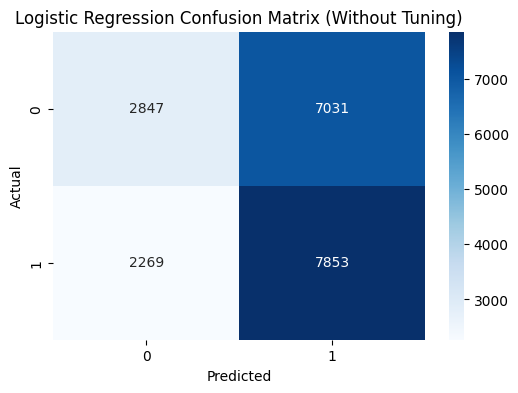

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Model Evaluation
y_pred_lr= lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)


print("Logistic Regression (Without Tuning) Results:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix (Without Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



# **Linear regression with hyperparameter tuning**

In [36]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [500, 1000, 2000],
    'penalty': ['l2']
}

lr_random = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit the tuned model
lr_random.fit(X_train, y_train)

# Predictions
y_pred_lr_tuned = lr_random.best_estimator_.predict(X_test)

# Evaluation Metrics
print("\n Logistic Regression (With Tuning) Report:")
print(classification_report(y_test, y_pred_lr_tuned))
print(f" Accuracy (With Tuning): {accuracy_score(y_test, y_pred_lr_tuned):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix (With Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Best Parameters for Logistic Regression: {lr_random.best_params_}")


KeyboardInterrupt: 

# **XGBCLASSIFIER**

Accuracy: 0.6073
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      9878
           1       0.61      0.63      0.62     10122

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



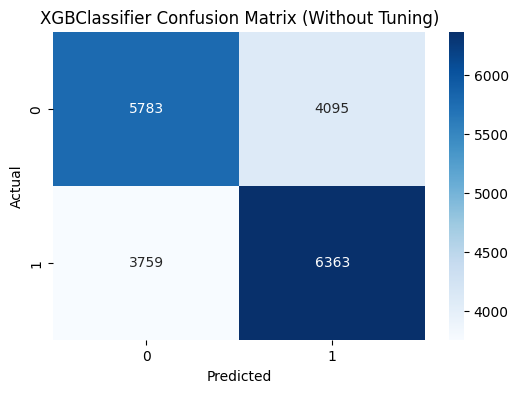

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize the XGBoost classifier
xgb = XGBClassifier(n_estimators=500, random_state=42)

# Train the model
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy:.4f}")

print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("XGBClassifier Confusion Matrix (Without Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **XGBCLASSIFIER with hyperparameter tuning**


 XGBoost (With Tuning) Report:
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      9878
           1       0.62      0.68      0.65     10122

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000

Accuracy (With Tuning): 0.6283


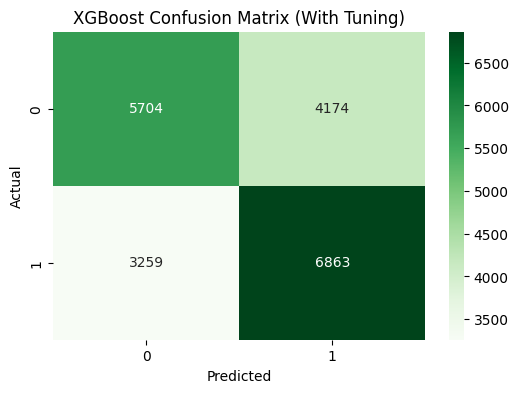

 Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_random = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Fit the tuned model
xgb_random.fit(X_train, y_train)

# Predictions
y_pred_xgb_tuned = xgb_random.best_estimator_.predict(X_test)

# Evaluation Metrics
print("\n XGBoost (With Tuning) Report:")
print(classification_report(y_test, y_pred_xgb_tuned))
print(f"Accuracy (With Tuning): {accuracy_score(y_test, y_pred_xgb_tuned):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix (With Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print(f" Best Parameters for XGBoost: {xgb_random.best_params_}")

# **Random Forest**

Random Forest (Without Tuning) Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      9878
           1       0.62      0.63      0.63     10122

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000

Accuracy (Without Tuning): 0.6174


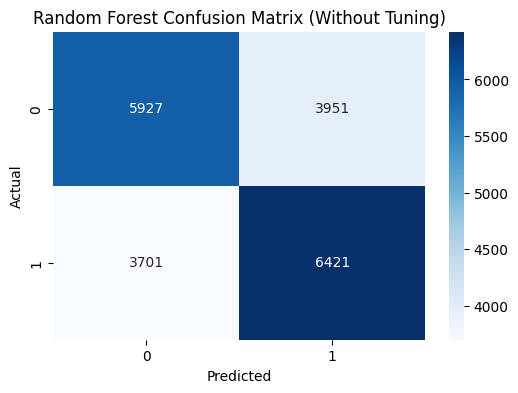

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation Metrics
print("Random Forest (Without Tuning) Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy (Without Tuning): {accuracy_score(y_test, y_pred_rf):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix (Without Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Random Forest with hyperparameter tuning**


 Random Forest (With Tuning) Report:
              precision    recall  f1-score   support

           0       0.64      0.53      0.58      9878
           1       0.61      0.71      0.66     10122

    accuracy                           0.62     20000
   macro avg       0.63      0.62      0.62     20000
weighted avg       0.62      0.62      0.62     20000

 Accuracy (With Tuning): 0.6223


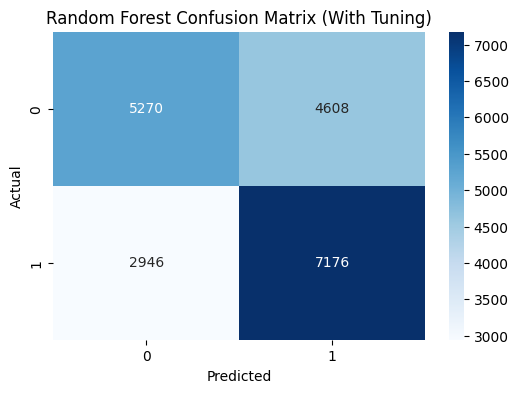

Best Parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 15}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

# Use RandomizedSearchCV for efficiency
rf_random= RandomizedSearchCV(rf, param_distributions=rf_params, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Predictions
y_pred_rf_tuned = rf_random.best_estimator_.predict(X_test)

# Evaluation Metrics
print("\n Random Forest (With Tuning) Report:")
print(classification_report(y_test, y_pred_rf_tuned))
print(f" Accuracy (With Tuning): {accuracy_score(y_test, y_pred_rf_tuned):.4f}")

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_tuned), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix (With Tuning)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Best Parameters for Random Forest: {rf_random.best_params_}")

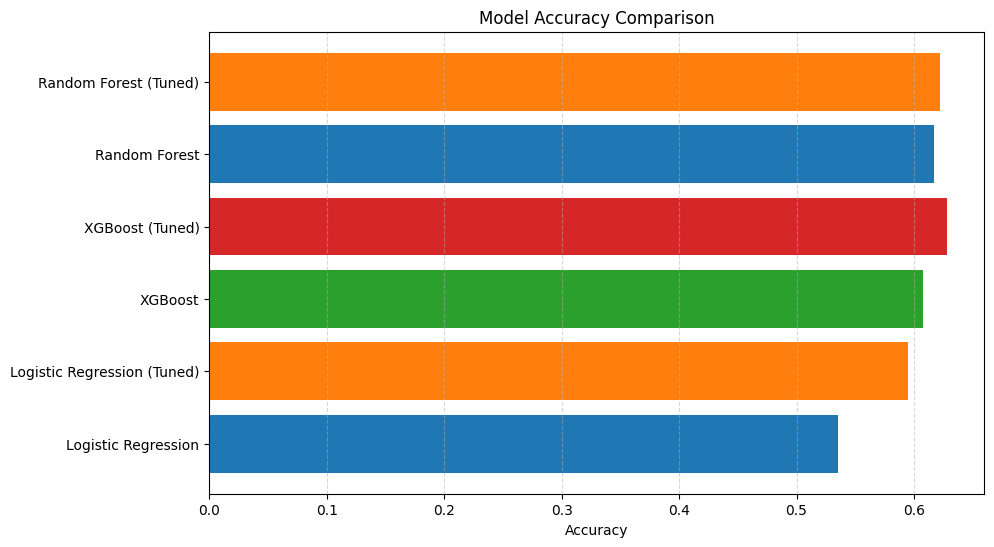

Model comparison and insights successfully generated!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Performance Comparison Data
comparison_data = {
    'Model': [
              'Logistic Regression', 'Logistic Regression (Tuned)',
              'XGBoost', 'XGBoost (Tuned)',
              'Random Forest', 'Random Forest (Tuned)'],
    
    'Accuracy': [
        
        accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_xgb_tuned),
        accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_rf_tuned)
    ]
}

# Create DataFrame for Visualization
comparison_df = pd.DataFrame(comparison_data)

# Accuracy Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(comparison_df['Model'], comparison_df['Accuracy'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


print("Model comparison and insights successfully generated!")


In [ ]:
test_data = test_data[X.columns]
test_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,AS_OS_Diff,Storage_Efficiency,RAM_Efficiency
0,-1,1,33,31,1856,0.0,0.149356,-0.133925,0.396528,-0.627359,...,-0.991417,-0.062099,-0.383937,-0.205661,-0.249205,1.544051,0.686662,-0.464804,2.717899,-0.480258
1,-1,1,33,11,2061,0.0,0.149356,-0.133925,-0.129853,1.293941,...,1.008657,-0.062099,-0.383937,-0.205661,-0.249205,-0.651288,0.906455,2.907727,-0.433905,-0.385687
2,-1,1,34,31,2444,0.0,0.149356,-0.133925,0.288324,1.293941,...,1.008657,-0.062099,-0.383937,-0.205661,-0.249205,-0.651288,0.466869,-0.040518,-0.436848,-0.622116
3,-1,1,36,31,2731,0.0,0.149356,-0.133925,-0.464177,1.293941,...,1.008657,-0.062099,-0.383937,-0.205661,-0.249205,-0.651288,0.466869,0.117230,0.117094,-0.196542
4,14487,1,28,26,1144,0.0,0.149356,-0.133925,-0.531288,3.215241,...,-0.991417,-0.062099,-0.383937,-0.205661,-0.249205,-0.651288,-0.192509,-0.845574,6.450116,-0.574831


In [ ]:
test_data.head()

,MachineID,ProductName,EngineVersion,AppVersion,SignatureVersion,IsBetaUser,RealTimeProtectionState,IsPassiveModeEnabled,AntivirusConfigID,NumAntivirusProductsInstalled,...,IsSecureBootEnabled,IsVirtualDevice,IsTouchEnabled,IsPenCapable,IsAlwaysOnAlwaysConnectedCapable,IsGamer,RegionIdentifier,AS_OS_Diff,Storage_Efficiency,RAM_Efficiency
0,-1,1,33,31,1856,0.0,0.149356,-0.133925,0.396528,-0.627359,...,-0.991417,-0.062099,-0.383937,-0.205661,-0.249205,1.544051,0.686662,-0.464804,2.717899,-0.480258
1,-1,1,33,11,2061,0.0,0.149356,-0.133925,-0.129853,1.293941,...,1.008657,-0.062099,-0.383937,-0.205661,-0.249205,-0.651288,0.906455,2.907727,-0.433905,-0.385687
2,-1,1,34,31,2444,0.0,0.149356,-0.133925,0.288324,1.293941,...,1.008657,-0.062099,-0.383937,-0.205661,-0.249205,-0.651288,0.466869,-0.040518,-0.436848,-0.622116
3,-1,1,36,31,2731,0.0,0.149356,-0.133925,-0.464177,1.293941,...,1.008657,-0.062099,-0.383937,-0.205661,-0.249205,-0.651288,0.466869,0.117230,0.117094,-0.196542
4,14487,1,28,26,1144,0.0,0.149356,-0.133925,-0.531288,3.215241,...,-0.991417,-0.062099,-0.383937,-0.205661,-0.249205,-0.651288,-0.192509,-0.845574,6.450116,-0.574831


In [ ]:
# test_predictions = rf_best.predict(test_data)  # Generate predictions

# # Create submission DataFrame (Ensure sample_submission exists)
# submission = submission.copy()
# submission['target'] = test_predictions  

# # If classification-like labels are needed (Assuming binary case)
# # Ensure model output is properly rounded or thresholded
# submission['target'] = submission['target'].apply(lambda x: '1' if x > 0.5 else '0')

# # Save to CSV
# submission.to_csv('submission.csv', index=False)

# # Output file ready for submission
# print("Submission file created.")

In [ ]:

y_pred=xgb_random.best_estimator_.predict(test_data)

submission = pd.DataFrame({"id": range(0,test_data.shape[0]), "target": y_pred})
submission.to_csv('submission.csv',index=False)
print("Submission file 'submission.csv' is ready!")

Submission file 'submission.csv' is ready!


In [ ]:
s= pd.read_csv("submission.csv")
s.head()

,id,target
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0
